In [22]:
from rdkit import Chem,DataStructs
import time,random
from collections import defaultdict
from rdkit.Chem import Draw,PandasTools,rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
from __future__ import print_function
from xml.etree import ElementTree
import pandas as pd
import rdkit
from rdkit import Chem
import numpy as np
print(rdBase.rdkitVersion)

2020.03.4


# Read SMILES and generate matched molecular pair (MMP).
## Workflow based on RDKIit MMPA fragmentation for the identification of activity cliffs


##### Generate canonical SMILES

In [24]:
sdf = Chem.SDMolSupplier( '.sdf' )
with open('test.smi', 'w') as f:
    for mol in sdf:
        smi = Chem.MolToSmiles(mol)
        f.write("{}\n".format(smi))

# Canonical SMILES and IC50 values are stored in a csv file
###### RDKit  MMPA fragmentation

In [28]:
import os
!pwd
os.chdir ('') #set directory
!pwd
data=pd.read_csv('.txt')

In [3]:
!python $RDBASE/Contrib/mmpa/rfrag.py < .csv > data_fragmented.txt

[20:34:28] SMILES Parse Error: syntax error while parsing: canonical_smiles
[20:34:28] SMILES Parse Error: Failed parsing SMILES '﻿canonical_smiles' for input: '﻿canonical_smiles'
Can't generate mol for: ﻿canonical_smiles


###### Generate MMPs that differ by less than a % of the molecule

In [5]:
!python $RDBASE/Contrib/mmpa/indexing.py -s -r 0.2 < data_fragmented.txt > data_mmps_default.txt

###### Take a look into the data:  smiles, compound id, smarts indicating the strctural changes and cores are represented 

In [6]:
mmps = pd.read_csv('data_mmps_default.txt',header=None,names=('smiles_1','smiles_2','molid_1','molid_2','tform','core'))

###### Set reference strcture for comparison

In [7]:
mmps[mmps.molid_1==22]

,smiles_1,smiles_2,molid_1,molid_2,tform,core
0,COc1cc(-c2cc(F)cc(C(C)C)c2NC(=O)NS(=O)(=O)Cc2c...,CC(C)c1cc(F)cc(-c2ccnc(C#N)c2)c1NC(=O)NS(=O)(=...,22,23,CO[*:1]>>N#C[*:1],CC(C)c1cc(F)cc(-c2ccnc([*:1])c2)c1NC(=O)NS(=O)...
2,COc1cc(-c2cc(F)cc(C(C)C)c2NC(=O)NS(=O)(=O)Cc2c...,COc1cc(-c2cc(F)cc(C(C)C)c2NC(=O)NS(=O)(=O)CC(C...,22,26,c1ccc([*:1])cc1>>CC(C)[*:1],COc1cc(-c2cc(F)cc(C(C)C)c2NC(=O)NS(=O)(=O)C[*:...
4,COc1cc(-c2cc(F)cc(C(C)C)c2NC(=O)NS(=O)(=O)Cc2c...,COc1cc(-c2cc(F)cc(C(C)C)c2NC(=O)NS(=O)(=O)CCc2...,22,34,C([*:1])[*:2]>>C(C[*:2])[*:1],COc1cc(-c2cc(F)cc(C(C)C)c2NC(=O)NS(=O)(=O)[*:1...
6,COc1cc(-c2cc(F)cc(C(C)C)c2NC(=O)NS(=O)(=O)Cc2c...,COc1cc(-c2cc(F)cc(C(C)C)c2NC(=O)NS(=O)(=O)C(C)...,22,21,C([*:1])[*:2]>>CC([*:1])[*:2],COc1cc(-c2cc(F)cc(C(C)C)c2NC(=O)NS(=O)(=O)[*:1...
27,COc1cc(-c2cc(F)cc(C(C)C)c2NC(=O)NS(=O)(=O)Cc2c...,COc1cc(-c2cc(F)cc(C(C)C)c2NC(=O)NS(=O)(=O)C(C)...,22,21,[*:1][H]>>C[*:1],COc1cc(-c2cc(F)cc(C(C)C)c2NC(=O)NS(=O)(=O)C(c2...


###### Drop

In [8]:
mmps=mmps.drop_duplicates(subset=("molid_1","molid_2"))

###### Visulize chemical strcture instead of smiles

,mol1,mol2,molid_1,molid_2,tform,core
0,,,22,23,CO[*:1]>>N#C[*:1],CC(C)c1cc(F)cc(-c2ccnc([*:1])c2)c1NC(=O)NS(=O)...
1,,,23,22,N#C[*:1]>>CO[*:1],CC(C)c1cc(F)cc(-c2ccnc([*:1])c2)c1NC(=O)NS(=O)...
2,,,22,26,c1ccc([*:1])cc1>>CC(C)[*:1],COc1cc(-c2cc(F)cc(C(C)C)c2NC(=O)NS(=O)(=O)C[*:...
3,,,26,22,CC(C)[*:1]>>c1ccc([*:1])cc1,COc1cc(-c2cc(F)cc(C(C)C)c2NC(=O)NS(=O)(=O)C[*:...
4,,,22,34,C([*:1])[*:2]>>C(C[*:2])[*:1],COc1cc(-c2cc(F)cc(C(C)C)c2NC(=O)NS(=O)(=O)[*:1...

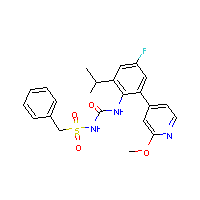
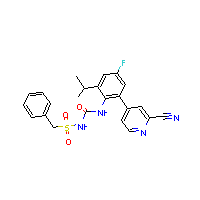
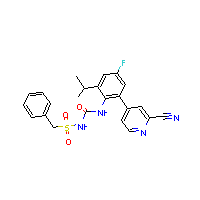
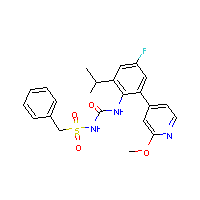
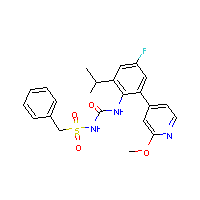
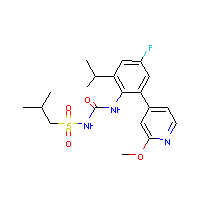
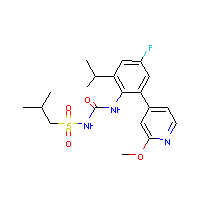
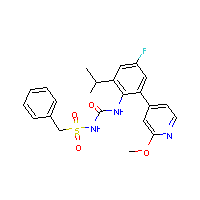
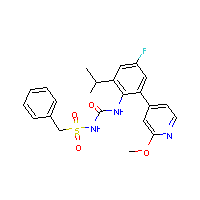
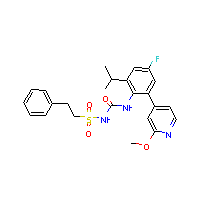

In [9]:
PandasTools.AddMoleculeColumnToFrame(mmps,'smiles_1','mol1')
PandasTools.AddMoleculeColumnToFrame(mmps,'smiles_2','mol2')
mmps = mmps[['mol1','mol2','molid_1','molid_2','tform','core']]
mmps.head()

###### Add activity data in the table

,mol1,mol2,molid_1,molid_2,tform,core,molregno _1,standard_value_1,molregno _2,standard_value_2
0,,,22,23,CO[*:1]>>N#C[*:1],CC(C)c1cc(F)cc(-c2ccnc([*:1])c2)c1NC(=O)NS(=O)...,22,100,23,1
1,,,34,23,CC(C)[*:1]>>c1ccc([*:1])cc1,CC(C)c1cc(F)cc(-c2ccnc(C#N)c2)c1NC(=O)NS(=O)(=...,34,100,23,1
2,,,34,23,CC(C)[*:1]>>c1ccc([*:1])cc1,CC(C)c1cc(F)cc(-c2ccnc(C#N)c2)c1NC(=O)NS(=O)(=...,34,100,23,1
3,,,27,23,C(C[*:1])[*:2]>>C([*:2])[*:1],CC(C)c1cc(F)cc(-c2ccnc(C#N)c2)c1NC(=O)NS(=O)(=...,27,1,23,1
4,,,30,23,CC([*:1])[*:2]>>C([*:1])[*:2],CC(C)c1cc(F)cc(-c2ccnc(C#N)c2)c1NC(=O)NS(=O)(=...,30,1,23,1

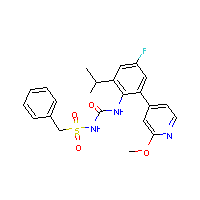
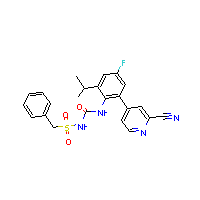
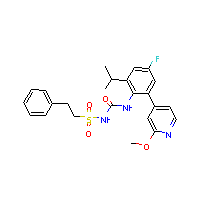
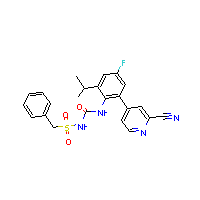
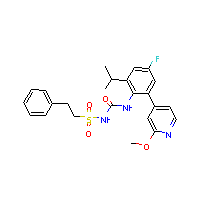
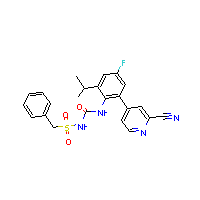
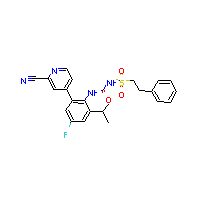
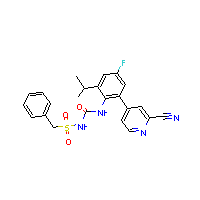
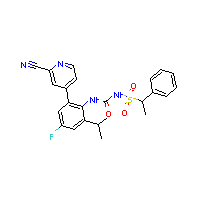
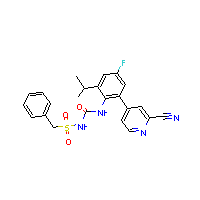

In [17]:
df=pd.read_csv('.csv')

t1=df[[' molregno ',' standard_value']]
mmpdds = mmps.merge(t1,left_on='molid_1',right_on=' molregno ',suffixes=("_1","_2")).\
   merge(t1,left_on='molid_2',right_on=' molregno ',suffixes=("_1","_2"))
mmpdds.head()

###### Represent data activity as pIC50

,mol2,molid_2,pKi_1,pKi_2,delta,tform,core
0,,23,7.0,9.0,2.0,CO[*:1]>>N#C[*:1],CC(C)c1cc(F)cc(-c2ccnc([*:1])c2)c1NC(=O)NS(=O)...
1,,23,7.0,9.0,2.0,CC(C)[*:1]>>c1ccc([*:1])cc1,CC(C)c1cc(F)cc(-c2ccnc(C#N)c2)c1NC(=O)NS(=O)(=...
2,,23,7.0,9.0,2.0,CC(C)[*:1]>>c1ccc([*:1])cc1,CC(C)c1cc(F)cc(-c2ccnc(C#N)c2)c1NC(=O)NS(=O)(=...
3,,23,9.0,9.0,0.0,C(C[*:1])[*:2]>>C([*:2])[*:1],CC(C)c1cc(F)cc(-c2ccnc(C#N)c2)c1NC(=O)NS(=O)(=...
4,,23,9.0,9.0,0.0,CC([*:1])[*:2]>>C([*:1])[*:2],CC(C)c1cc(F)cc(-c2ccnc(C#N)c2)c1NC(=O)NS(=O)(=...

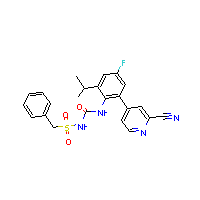
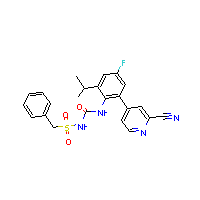
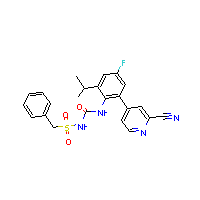
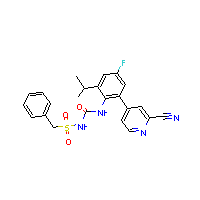
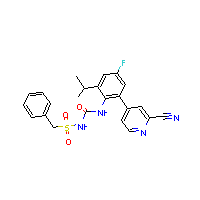

In [19]:
import math
mmpdds['pKi_1']=mmpdds.apply(lambda row:-1*math.log10(float(row[' standard_value_1'])*1e-9),axis=1)
mmpdds['pKi_2']=mmpdds.apply(lambda row:-1*math.log10(float(row[' standard_value_2'])*1e-9),axis=1)
mmpdds['delta']=mmpdds['pKi_2']-mmpdds['pKi_1']
mmpdds=mmpdds[['mol2','molid_2','pKi_1','pKi_2','delta','tform','core']]
mmpdds.head()

##### Analysis
##### Analize how oftern a chemical modification accur

In [20]:
gs=mmpdds.groupby('tform')
vs = [(len(y),x) for x,y in gs]
vs.sort(reverse=True)
vs[:]


[(6, 'N#C[*:1]>>CO[*:1]'),
 (6, 'CO[*:1]>>N#C[*:1]'),
 (3, 'c1ccc([*:1])cc1>>CC(C)[*:1]'),
 (3, 'CC([*:1])[*:2]>>C(C[*:2])[*:1]'),
 (3, 'CC(C)[*:1]>>c1ccc([*:1])cc1'),
 (3, 'C([*:1])[*:2]>>C(C[*:2])[*:1]'),
 (3, 'C(C[*:1])[*:2]>>CC([*:2])[*:1]'),
 (3, 'C(C[*:1])[*:2]>>C([*:2])[*:1]'),
 (2, 'CC([*:1])[*:2]>>C([*:1])[*:2]'),
 (2, 'C([*:1])[*:2]>>CC([*:1])[*:2]')]

###### Summary and statisical analysis

In [21]:
gs['delta'].describe()

,count,mean,std,min,25%,50%,75%,max
tform,,,,,,,,
C(C[*:1])[*:2]>>C([*:2])[*:1],3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
C(C[*:1])[*:2]>>CC([*:2])[*:1],3.0,1.333333,1.154701,0.0,1.0,2.0,2.0,2.0
C([*:1])[*:2]>>C(C[*:2])[*:1],3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
C([*:1])[*:2]>>CC([*:1])[*:2],2.0,1.000000,1.414214,0.0,0.5,1.0,1.5,2.0
CC(C)[*:1]>>c1ccc([*:1])cc1,3.0,1.333333,1.154701,0.0,1.0,2.0,2.0,2.0
CC([*:1])[*:2]>>C(C[*:2])[*:1],3.0,-1.333333,1.154701,-2.0,-2.0,-2.0,-1.0,0.0
CC([*:1])[*:2]>>C([*:1])[*:2],2.0,-1.000000,1.414214,-2.0,-1.5,-1.0,-0.5,0.0
CO[*:1]>>N#C[*:1],6.0,1.000000,1.095445,0.0,0.0,1.0,2.0,2.0
N#C[*:1]>>CO[*:1],6.0,-1.000000,1.095445,-2.0,-2.0,-1.0,0.0,0.0
